# Distribution of the sample mean

Here we will sample repeatedly from a population and investigate how the distribution of the sample mean depends on the sample size. The "population" we will sample from is the length of Swedish men measured when they were 18-20 years old. The data comes from Inskrivningsarkivregistret and were made public by Riksarkivet (Swedish National Archives). Although the data does not represent the complete population of Swedish men, we pretend it does for this exercise.  

In [1]:
## load the ggplot2 package for pretty plotting, and load data
require(ggplot2)
options(repr.plot.width=14, repr.plot.height=8)
## load data from Riksarkivet, height and weight of military conscripts
data <- readRDS("insark_h_w.rds")

Loading required package: ggplot2



Let's look at the population data.

[1] 421929      2

[1] 178.7245

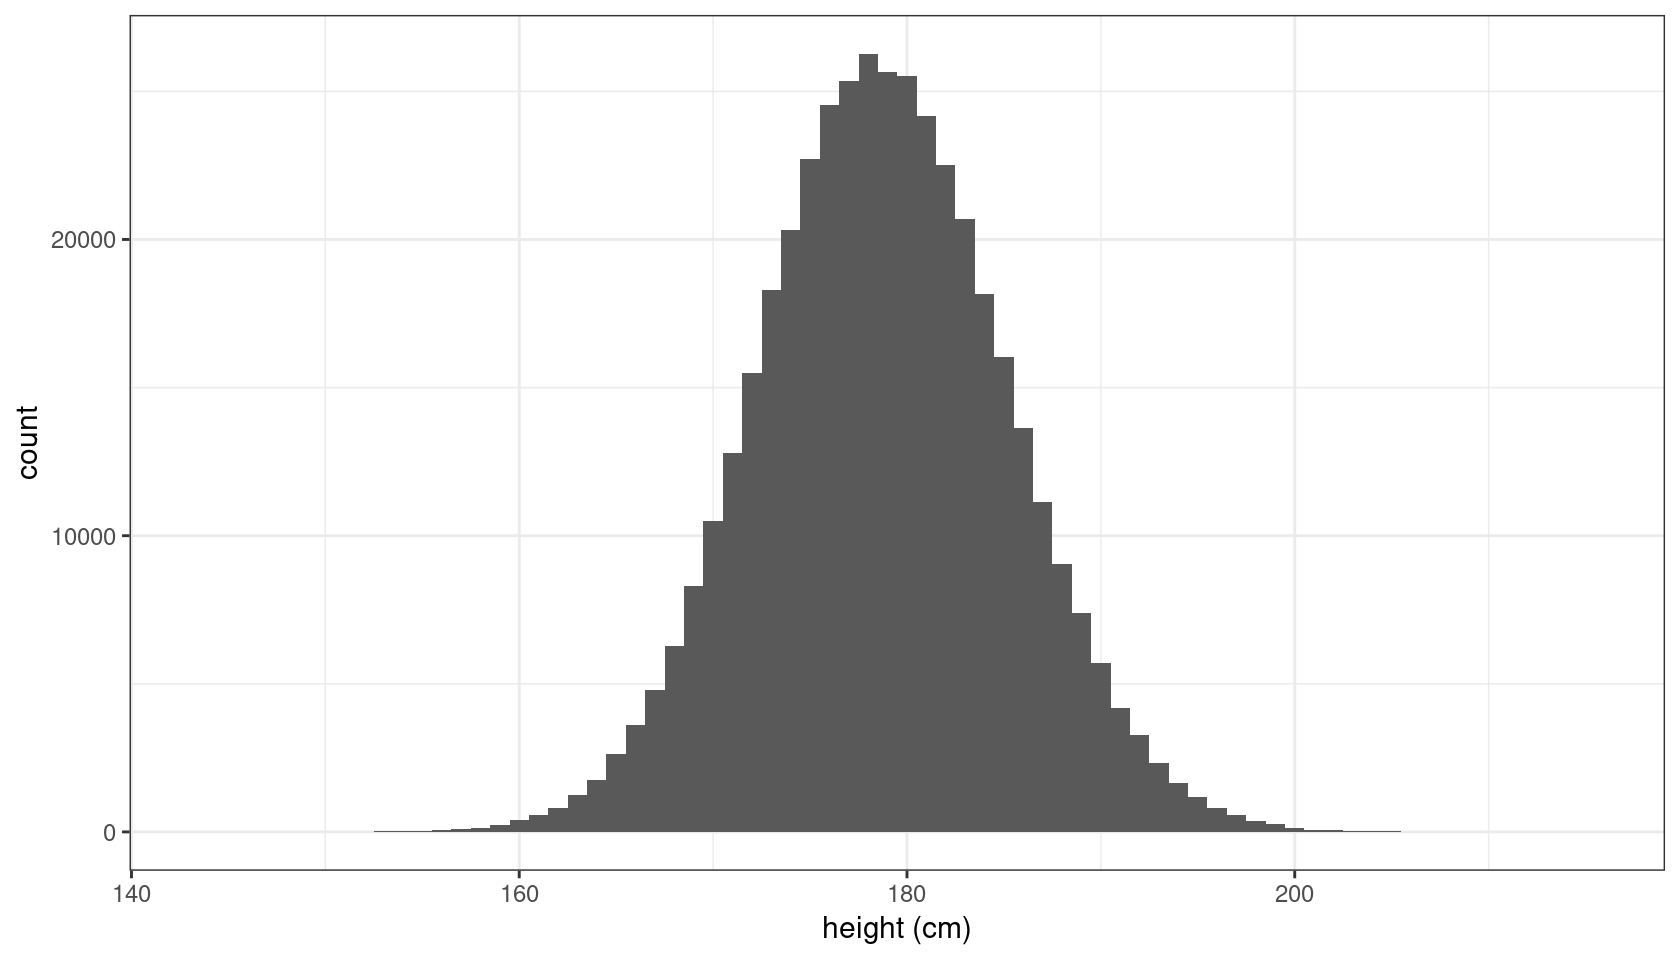

In [2]:
dim(data)
mean(data$h)
ggplot(data=data,aes(x=h))+geom_histogram(binwidth=1)+xlab("height (cm)")+ylab("count")+theme_bw(base_size=18)

We see that the "population" mean is 178.7 cm. Let's try to estimate this from a sample from this population.

In [3]:
nsamp <- 10
samp <- sample(data$h,nsamp,replace=FALSE)
mean(samp)

[1] 180.2

Now we can repeat this sampling a number times and for different sample sizes. 

In [18]:
nsamp <- 10
niter <- 5000
smean10 <- vector(length=niter)
for (i in 1:niter){
    smean10[i] <- mean(sample(data$h,nsamp,replace=FALSE))
}
nsamp <- 20
smean20 <- vector(length=niter)
for (i in 1:niter){
    smean20[i] <- mean(sample(data$h,nsamp,replace=FALSE))
}
nsamp <- 100
smean100 <- vector(length=niter)
for (i in 1:niter){
    smean100[i] <- mean(sample(data$h,nsamp,replace=FALSE))
}

Now we will plot these three different sets of sample means.

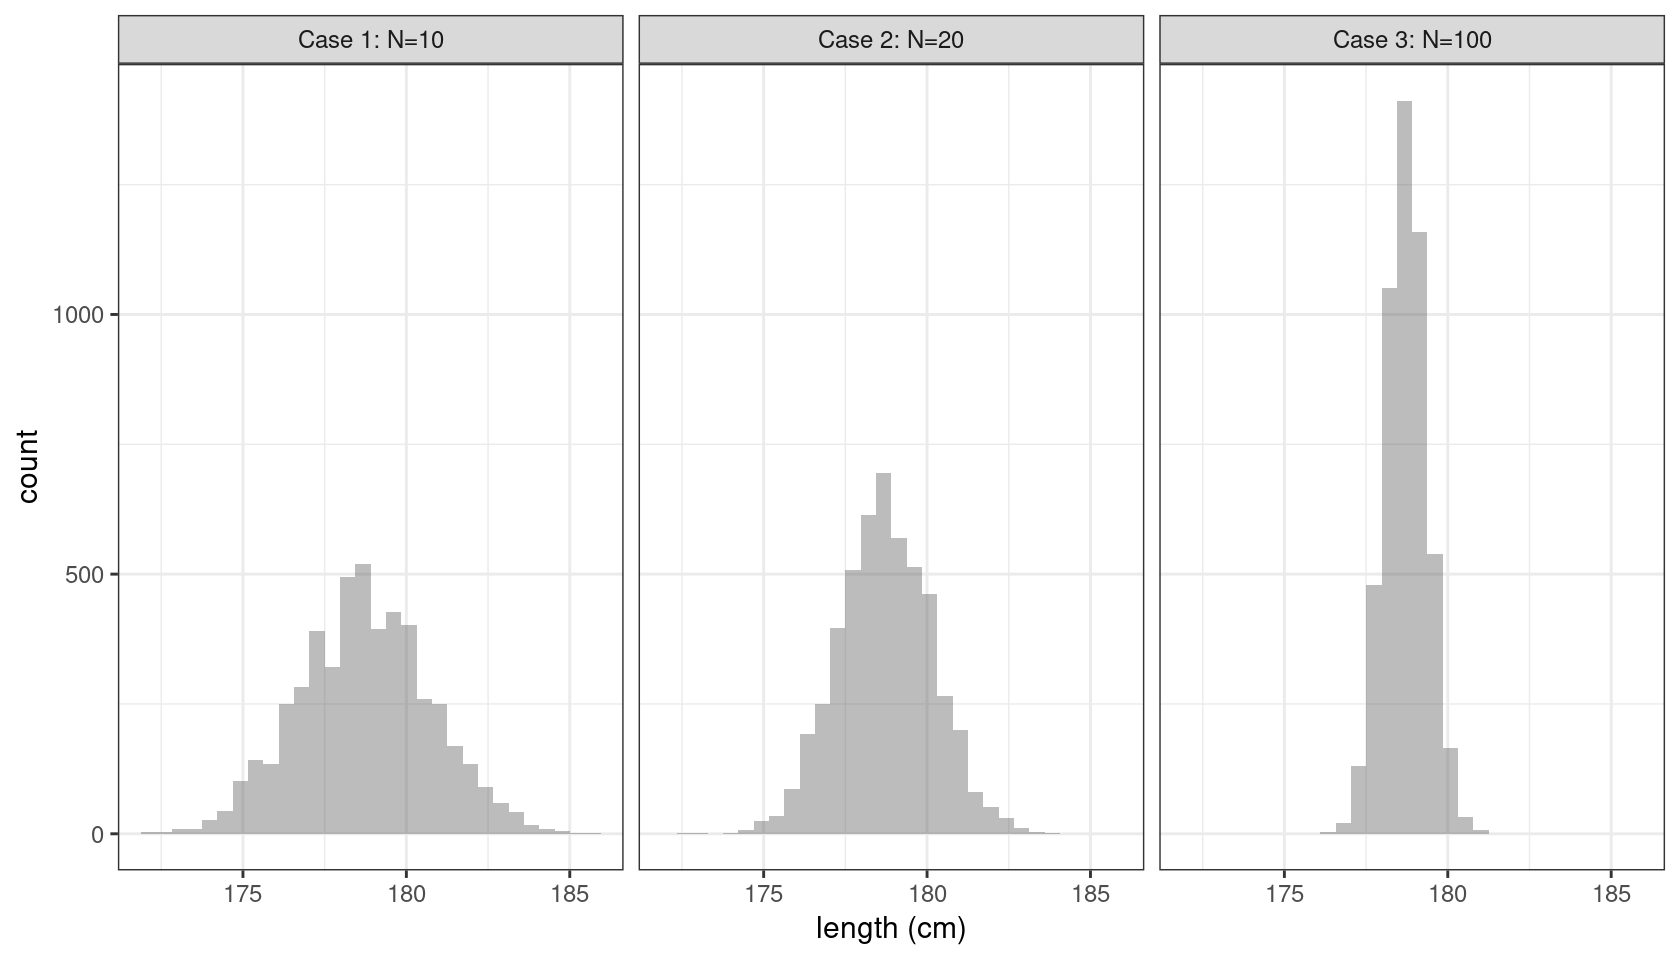

In [19]:
## make a data frame for plotting
df <- data.frame(x=smean10,N="Case 1: N=10")
df <- rbind(df,data.frame(x=smean20,N="Case 2: N=20"))
df <- rbind(df,data.frame(x=smean100,N="Case 3: N=100"))

ggplot(data=df,aes(x=x)) + facet_wrap(.~as.factor(N))+
geom_histogram(position='identity',alpha=0.4,bins=30)+xlab("length (cm)")+theme_bw(base_size=18)

Note the different scales on the X-axis. With larger sample, the variability is reduced and the distributon becomes more normal.